# Regularization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

In [87]:
# Meseares of various features and diabetes disease progression for 442 patients.
# Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
df = pd.read_csv('diabetes.csv')
df.head()

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [88]:
names = list(df.columns.values)
features = names[:-1]
target = names[-1]

print(features)
print(target)

['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
DIS


In [89]:
X = df.loc[:,features].to_numpy()
y = df[target].to_numpy()

X.shape, y.shape

((442, 10), (442,))

In [90]:
def standardize(data):
    return (data - X.mean(axis=0)) / X.std(axis=0)

In [91]:
Xs = standardize(X)

In [92]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xs, y);

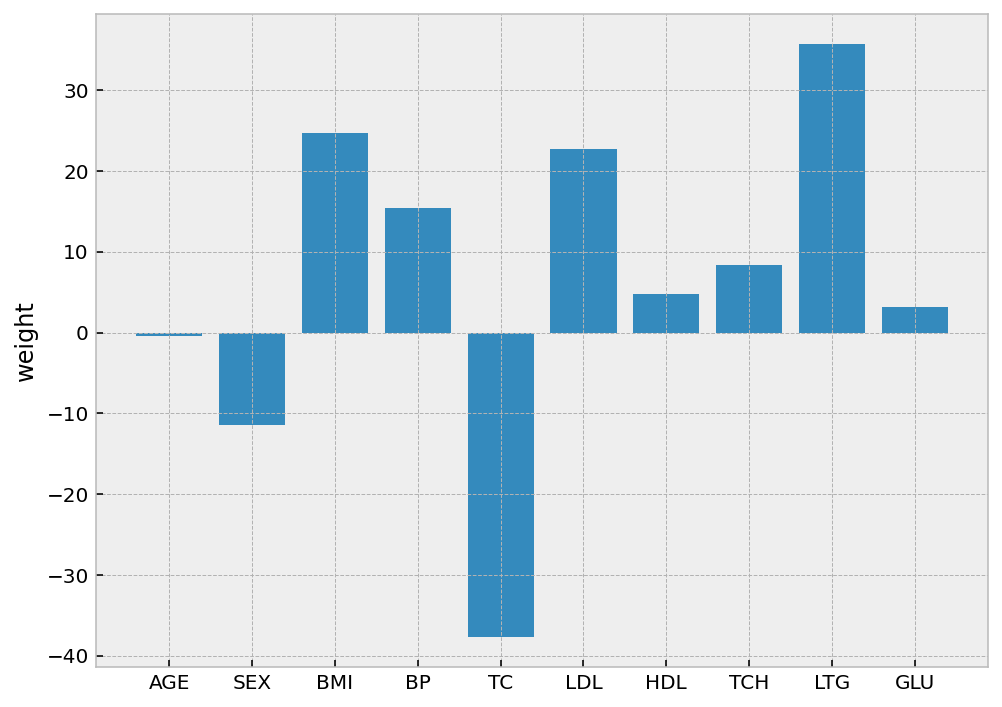

In [93]:
n = len(model.coef_)
plt.bar(range(n), model.coef_)
plt.xticks(range(n), features)
plt.ylabel('weight');

What if we try training the model on either the first or last 100 patients only?

In [94]:
model1 = LinearRegression()
model1.fit(Xs[:100], y[:100])

model2 = LinearRegression()
model2.fit(Xs[-100:], y[-100:]);

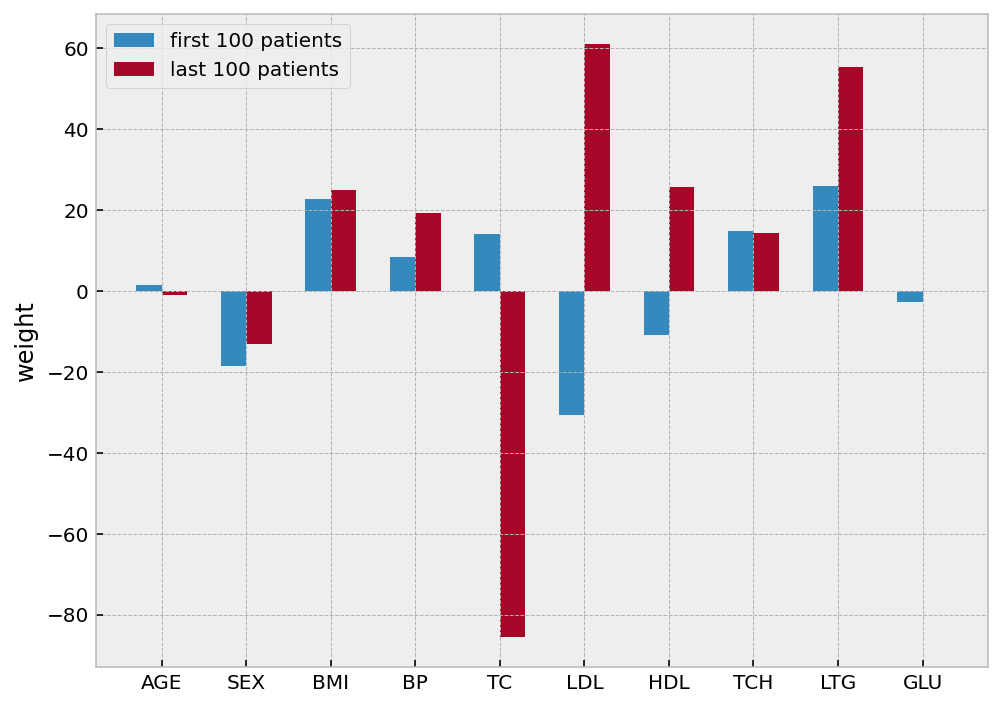

In [95]:
# first vs last 100 patients
n = len(model1.coef_)
plt.bar(np.arange(n)-0.15, model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.legend();

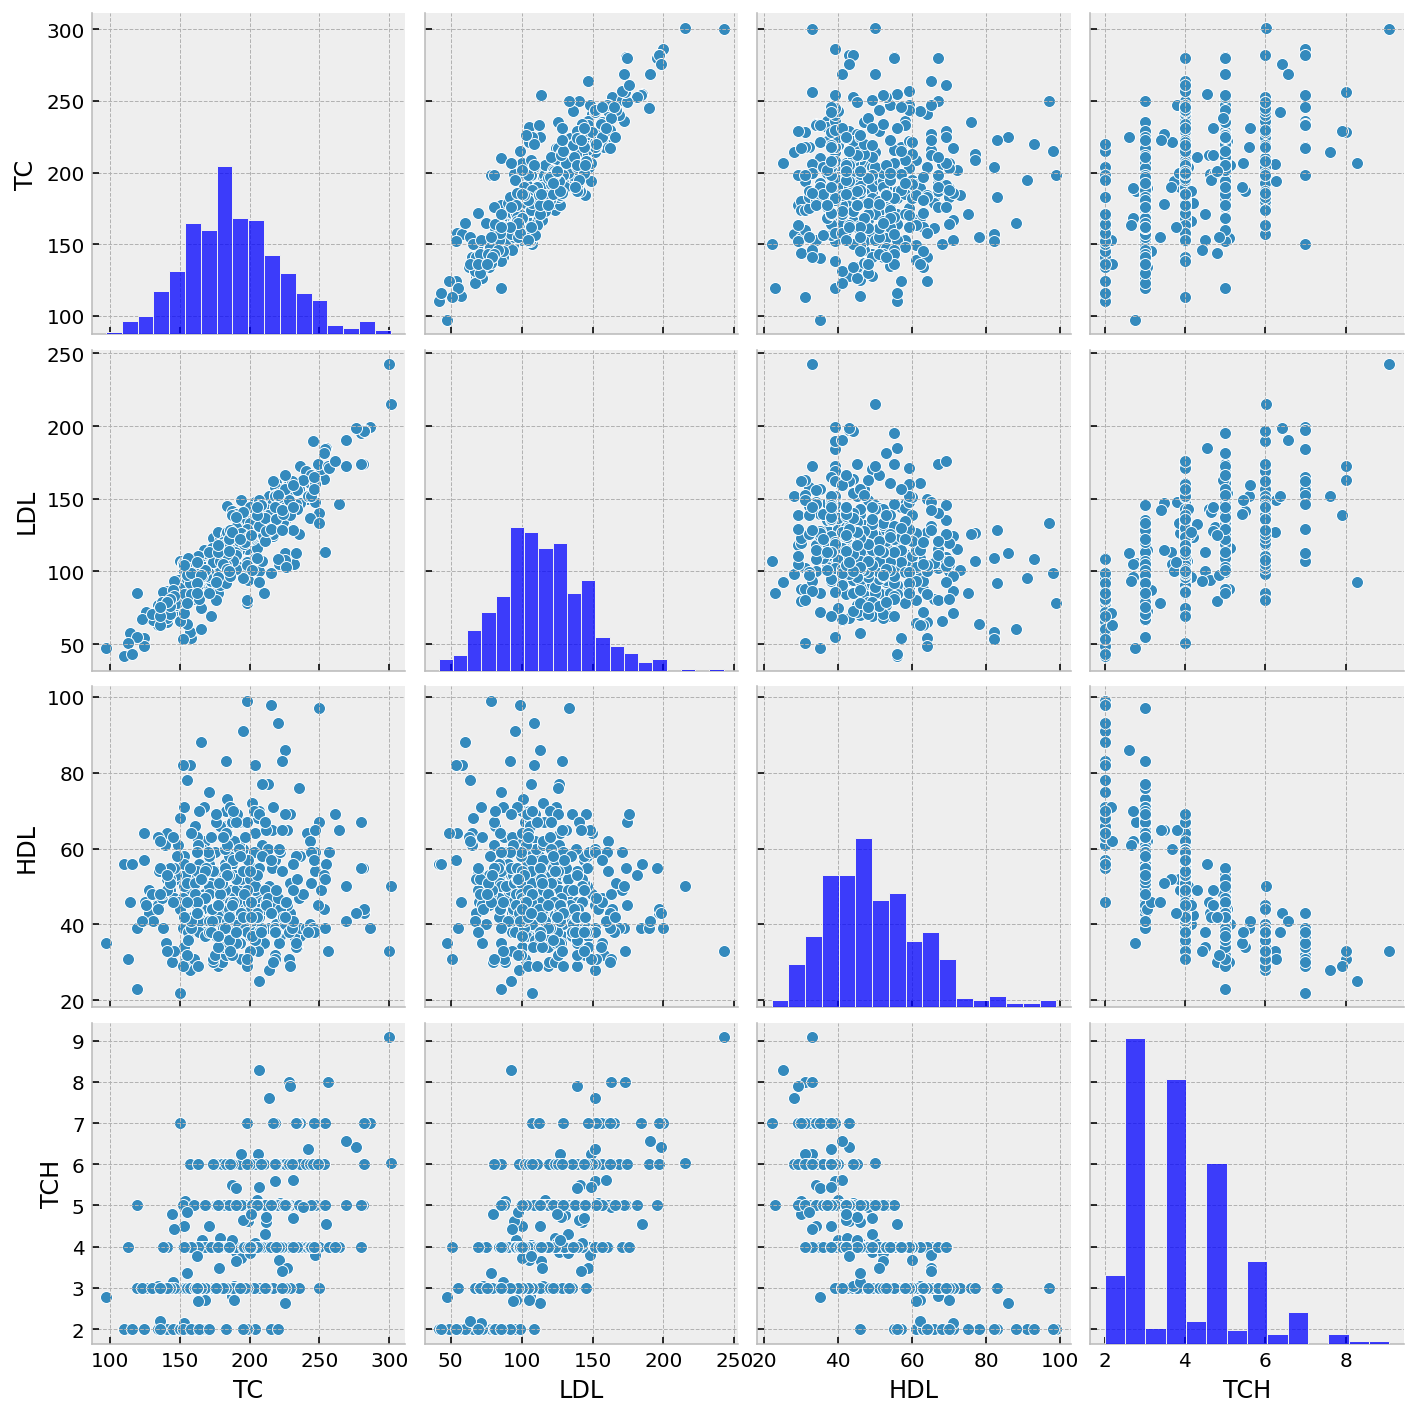

In [96]:
import seaborn as sns

sns.pairplot(df[['TC', 'LDL', 'HDL', 'TCH']]);

Correlation

![](images/correlation.png)

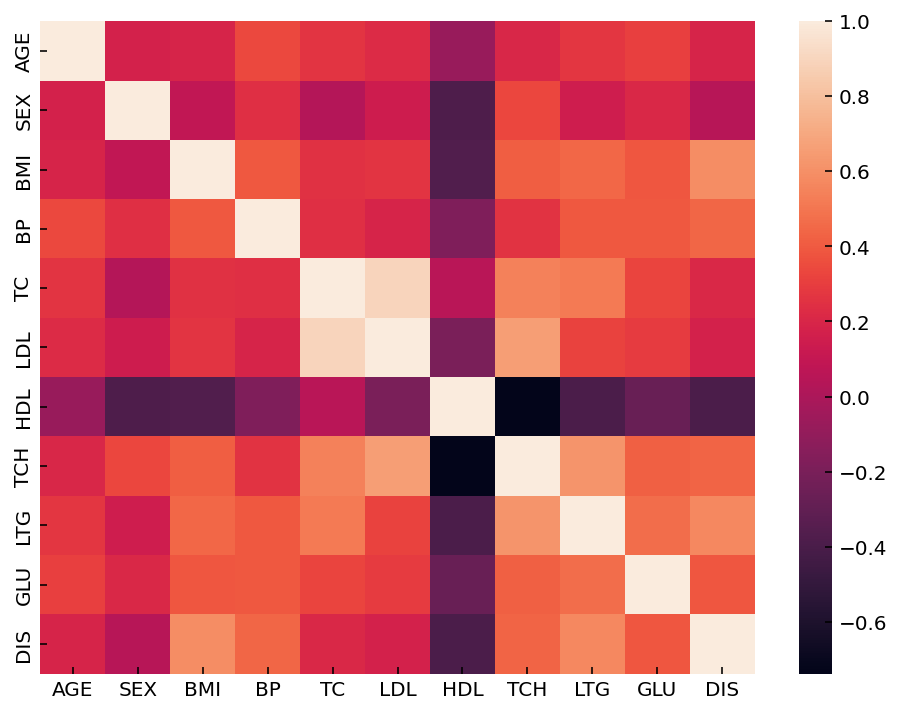

In [97]:
sns.heatmap(df.corr());

In [98]:
features = np.array(features)
features

array(['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU'],
      dtype='<U3')

In [99]:
not_TC = (features != "TC")
not_TC

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [100]:
Xs.shape, Xs[:,not_TC].shape

((442, 10), (442, 9))

Let's train the model on either the first or last 100 patients, but exclude TC from the list of predictors.

In [101]:
model1_no_TC = LinearRegression()
model1_no_TC.fit(Xs[:100,not_TC], y[:100])

model2_no_TC = LinearRegression()
model2_no_TC.fit(Xs[-100:,not_TC], y[-100:]);

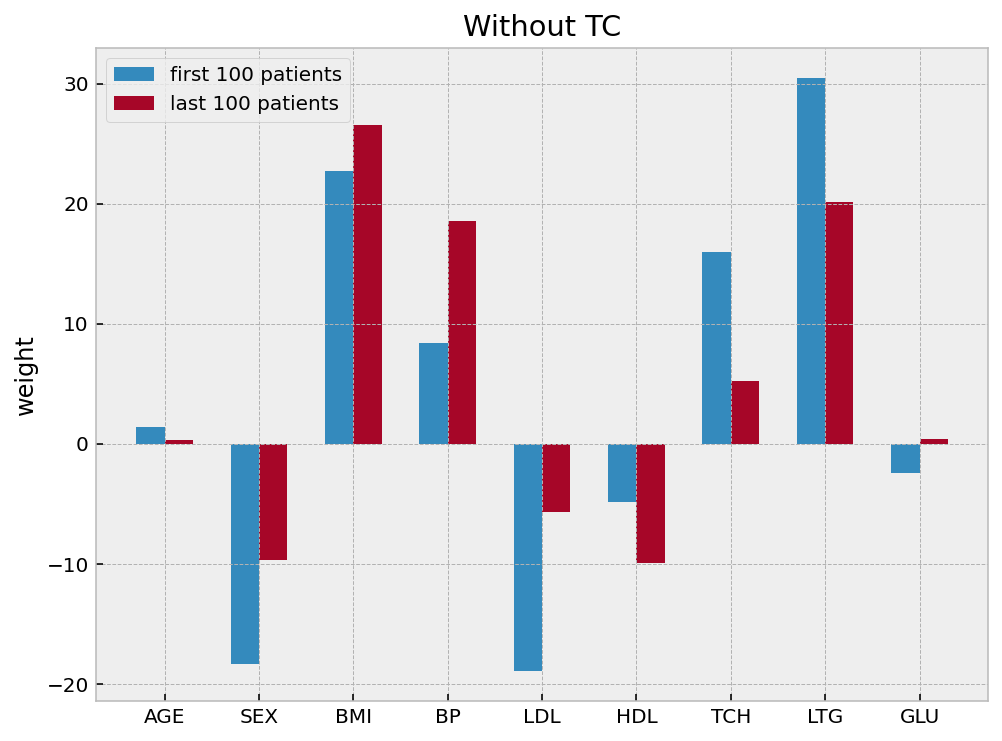

In [102]:
# first vs last 100 patients without TC
n = len(model1_no_TC.coef_)
plt.bar(np.arange(n)-0.15, model1_no_TC.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2_no_TC.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features[not_TC])
plt.ylabel('weight')
plt.title('Without TC')
plt.legend();

What about excluding LDL?

In [103]:
not_LDL = (features != "LDL")

model1_no_LDL = LinearRegression()
model1_no_LDL.fit(Xs[:100,not_LDL], y[:100])

model2_no_LDL = LinearRegression()
model2_no_LDL.fit(Xs[-100:,not_LDL], y[-100:]);

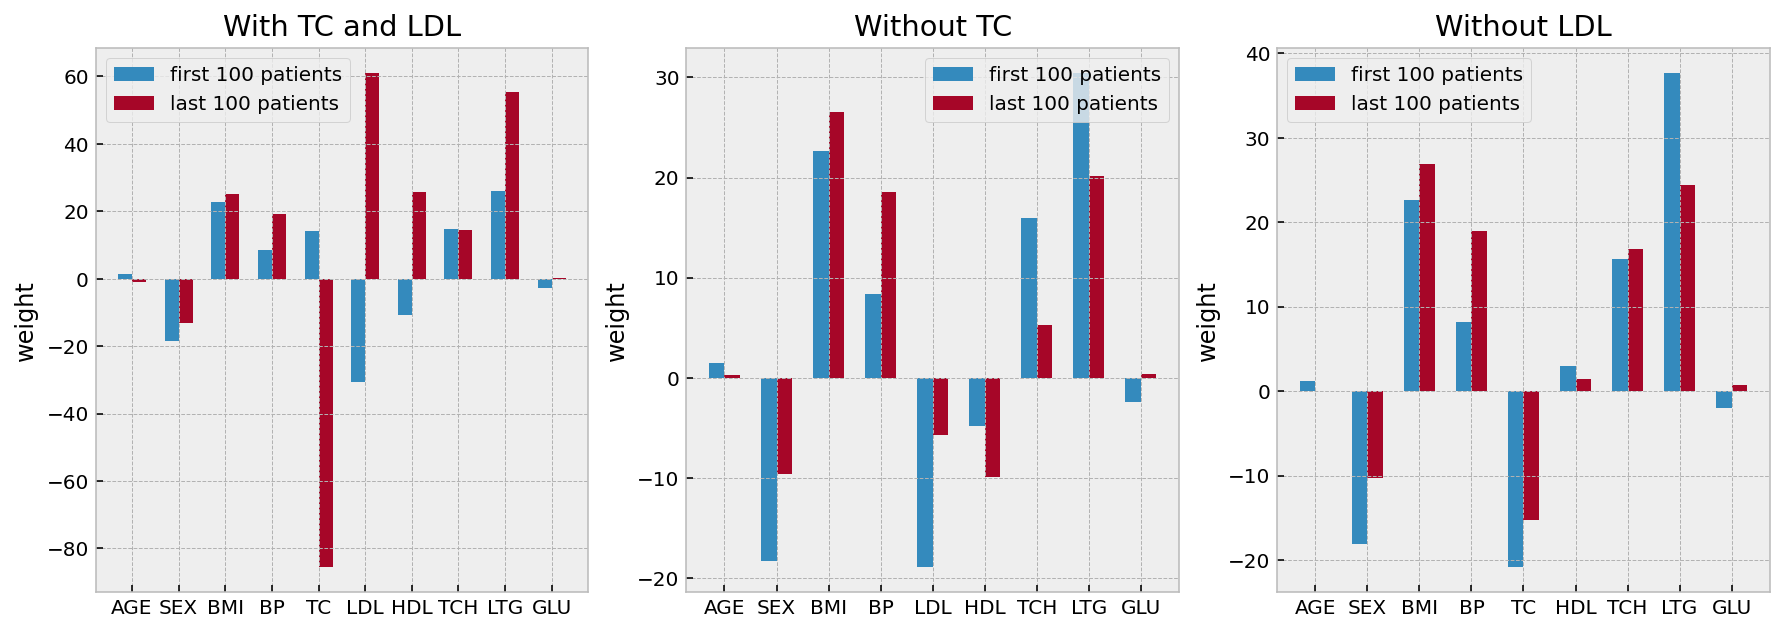

In [104]:
# first vs last 100 patients with and without TC or LDL
plt.figure(figsize=[15,5])
plt.subplot(131)
n = len(model1.coef_)
plt.bar(np.arange(n)-0.15, model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('With TC and LDL')
plt.legend()

plt.subplot(132)
n = len(model1_no_TC.coef_)
plt.bar(np.arange(n)-0.15, model1_no_TC.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2_no_TC.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features[not_TC])
plt.ylabel('weight')
plt.title('Without TC')
plt.legend()

plt.subplot(133)
n = len(model1_no_LDL.coef_)
plt.bar(np.arange(n)-0.15, model1_no_LDL.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2_no_LDL.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features[not_LDL])
plt.ylabel('weight')
plt.title('Without LDL')
plt.legend();

The overall effect of both TC and LDL should have a weight of ~10-20.

So what's wrong with a model like the one for the last 100 patients that includes both TC and LDL?

The huge opposing weights will lead to high variability in the model's predictions based on random differences in patient TC and LDL measurements.

Thus, the model may not generalize well when making predictions for new patients.

### Linear regression

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ...$

The residuals are the difference between the data $y$ and the model prediction $\hat{y}$.

The residual sum of squared errors ($RSS$):

$RSS = \sum{{(y - \hat{y})}^2}$

A linear regression model seeks the weights ($\beta_i$) that minimize $RSS$.

### Ridge Regularization

L2 norm $= \sum_i{\beta_i^2}$

A Ridge regression model seeks the weights ($\beta_i$) that minimize $RSS + \alpha \sum_i{\beta_i^2}$.

What effect will this have on the model weights ($\beta_i$)?

Let's try a Ridge regression model with $\alpha = 10$.

In [105]:
from sklearn.linear_model import Ridge

ridge_model1 = Ridge(alpha=10)
ridge_model1.fit(Xs[:100], y[:100])

ridge_model2 = Ridge(alpha=10)
ridge_model2.fit(Xs[-100:], y[-100:]);

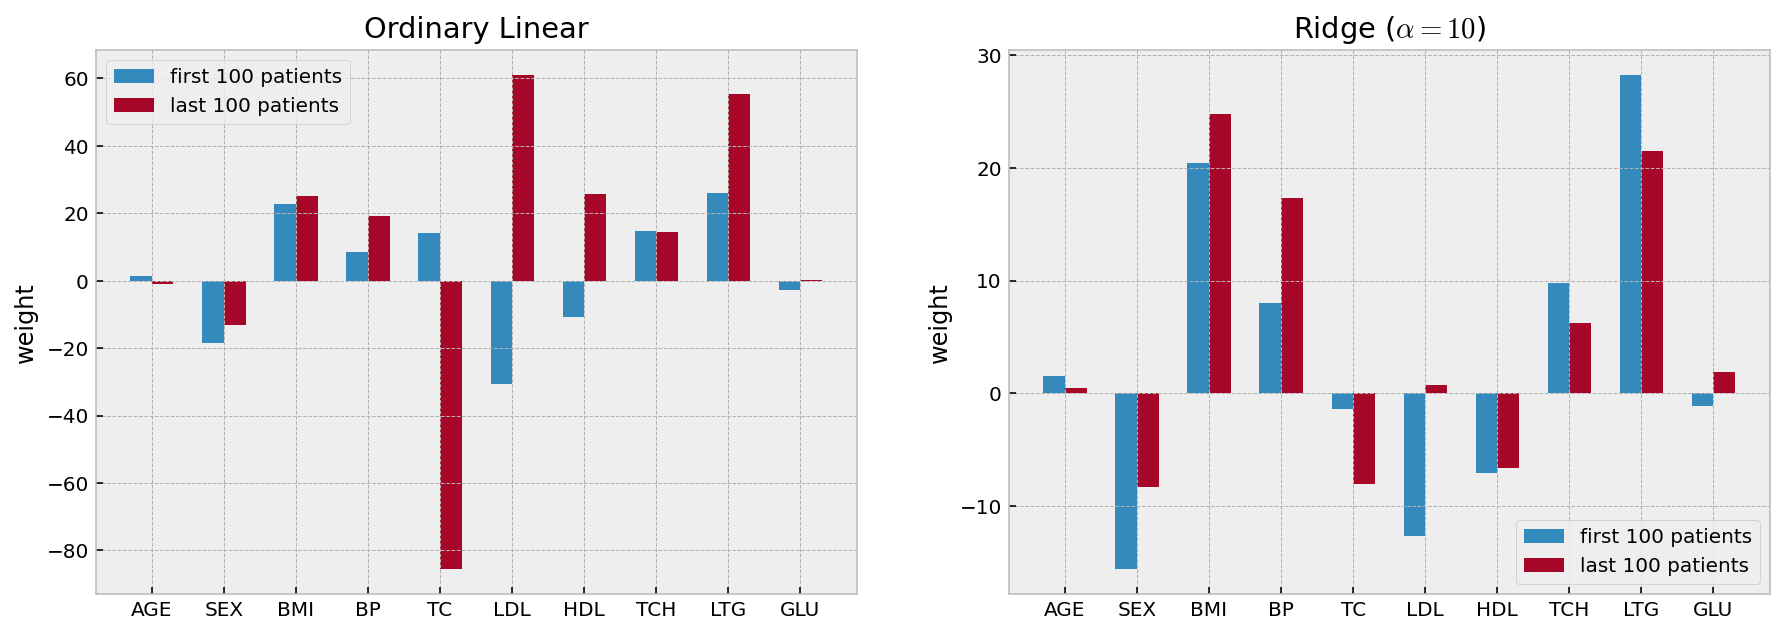

In [106]:
# first vs last 100 patients with and without Ridge model
plt.figure(figsize=[15,5])
plt.subplot(121)
n = len(model1.coef_)
plt.bar(np.arange(n)-0.15, model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Ordinary Linear')
plt.legend()

plt.subplot(122)
n = len(ridge_model1.coef_)
plt.bar(np.arange(n)-0.15, ridge_model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, ridge_model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title(r'Ridge ($\alpha = 10$)')
plt.legend();

Let's compare $\alpha = 1$ vs. $\alpha = 10$.

In [107]:
ols_model = LinearRegression()
ols_model.fit(Xs, y)

ridge_model_a1 = Ridge(alpha=1)
ridge_model_a1.fit(Xs, y)

ridge_model_a10 = Ridge(alpha=10)
ridge_model_a10.fit(Xs, y);

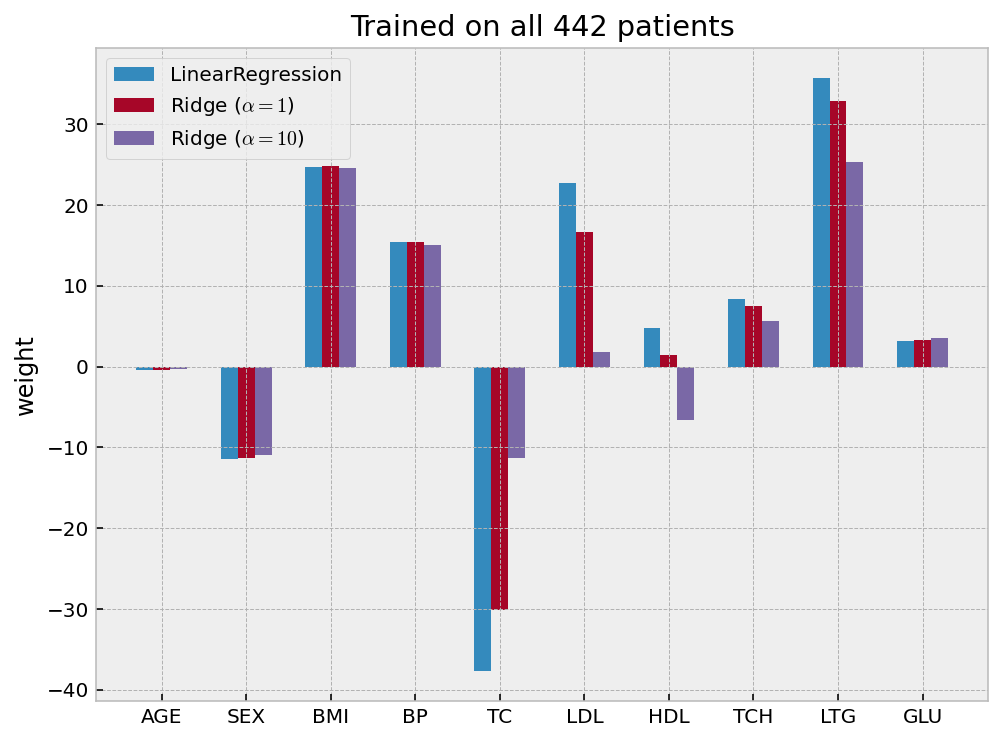

In [108]:
n = len(ols_model.coef_)
plt.bar(np.arange(n)-0.2, ols_model.coef_, width=0.2, label='LinearRegression')
plt.bar(np.arange(n)+0.0, ridge_model_a1.coef_, width=0.2, label=r'Ridge ($\alpha = 1$)')
plt.bar(np.arange(n)+0.2, ridge_model_a10.coef_, width=0.2, label=r'Ridge ($\alpha = 10$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

### Lasso Regularization

L1 norm $= \sum_i{\left|\beta_i\right|}$

A Lasso regression model seeks the weights ($\beta_i$) that minimize $RSS + \alpha \sum_i{\left|\beta_i\right|}$.

What effect will this have on the model weights ($\beta_i$)?

Let's try a Lasso regression model with $\alpha = 1$.

In [109]:
from sklearn.linear_model import Lasso

lasso_model_a1 = Lasso(alpha=1)
lasso_model_a1.fit(Xs, y);

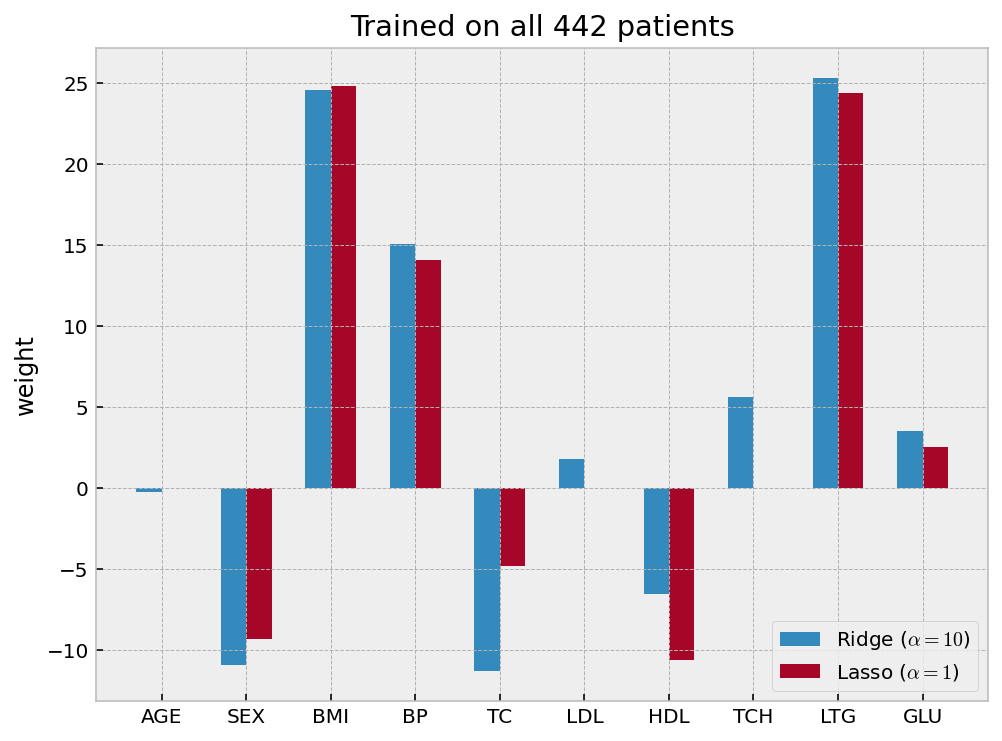

In [110]:
n = len(ridge_model_a10.coef_)
plt.bar(np.arange(n)-0.15, ridge_model_a10.coef_, width=0.3, label=r'Ridge ($\alpha = 10$)')
plt.bar(np.arange(n)+0.15, lasso_model_a1.coef_, width=0.3, label=r'Lasso ($\alpha = 1$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

In [111]:
lasso_model_a1.coef_

array([ -0.        ,  -9.31941253,  24.83127631,  14.08870568,
        -4.83892808,  -0.        , -10.62279919,   0.        ,
        24.42081057,   2.56212987])

In [112]:
lasso_model_a10 = Lasso(alpha=10)
lasso_model_a10.fit(Xs, y)

lasso_model_a10.coef_

array([ 0.        , -0.        , 22.60037484,  6.80123653, -0.        ,
       -0.        , -3.08803938,  0.        , 19.58593242,  0.        ])

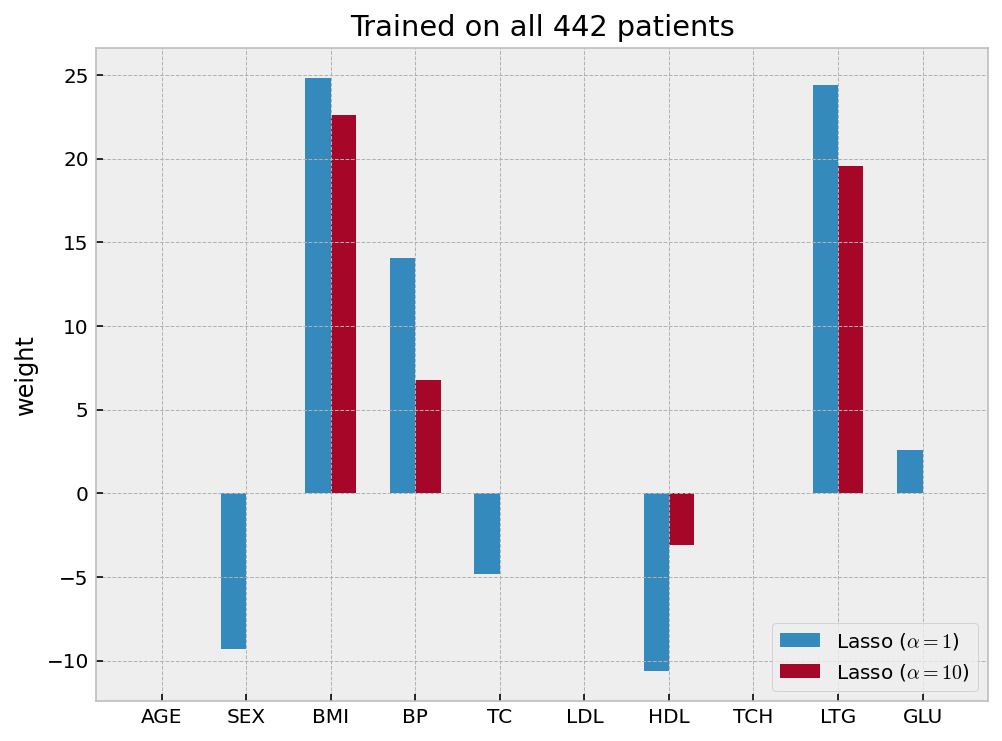

In [113]:
n = len(lasso_model_a1.coef_)
plt.bar(np.arange(n)-0.15, lasso_model_a1.coef_, width=0.3, label=r'Lasso ($\alpha = 1$)')
plt.bar(np.arange(n)+0.15, lasso_model_a10.coef_, width=0.3, label=r'Lasso ($\alpha = 10$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

### Elastic Net Regularization

An Elastic Net regression model seeks the weights ($\beta_i$) that minimize $RSS + \alpha_1 \sum_i{\left|\beta_i\right|} + \alpha_2 \sum_i{\beta_i^2}$.

In [114]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet(alpha=1, l1_ratio=0.5)  # L1=0.5 (lasso), L2=0.5 (ridge)
enet_model.fit(Xs, y)

lasso_model = Lasso(alpha=1)
lasso_model.fit(Xs, y)

ridge_model = Ridge(alpha=10)
ridge_model.fit(Xs, y);

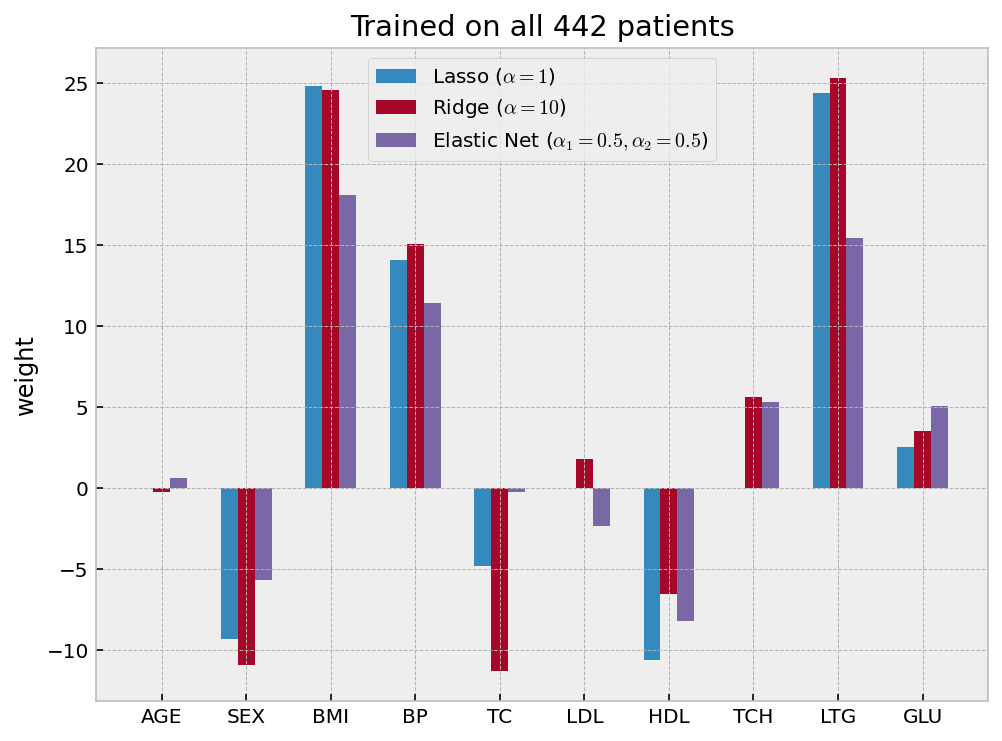

In [115]:
n = len(enet_model.coef_)
plt.bar(np.arange(n)-0.2, lasso_model.coef_, width=0.2, label=r'Lasso ($\alpha = 1$)')
plt.bar(np.arange(n)+0.0, ridge_model.coef_, width=0.2, label=r'Ridge ($\alpha = 10$)')
plt.bar(np.arange(n)+0.2, enet_model.coef_, width=0.2, label=r'Elastic Net ($\alpha_1 = 0.5, \alpha_2 = 0.5$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

![](images/lasso-ridge-enet.png)

Let's say we want to use a Ridge model to predict diabetes progression in patients.

What value of $\alpha$ should you use?

Each different value of $\alpha$ is essentially a different Ridge model.

So asking **which $\alpha$** is akin to asking **which Ridge model to select**?

Consider a bunch of different values for $\alpha$ ranging from $10^{-5}$ to $10^2$.

In [116]:
alphas = np.logspace(-5, 2, 50)

Generate a Ridge model for each of the above $\alpha$ and select the best one.

# Question

How will you decide which Ridge model (i.e., $\alpha$) is the best?

*Hint: You want a model that both fits the data well and generalizes to new data it was not trained on.*

In [117]:
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, shuffle=True, test_size=0.5, random_state=1)

Xs_train.shape, Xs_test.shape

((221, 10), (221, 10))

In [118]:
alphas = np.logspace(-5, 2, 50)
test_score = np.zeros(alphas.shape)

for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha)
    model.fit(Xs_train, y_train)
    test_score[i] = model.score(Xs_test, y_test)

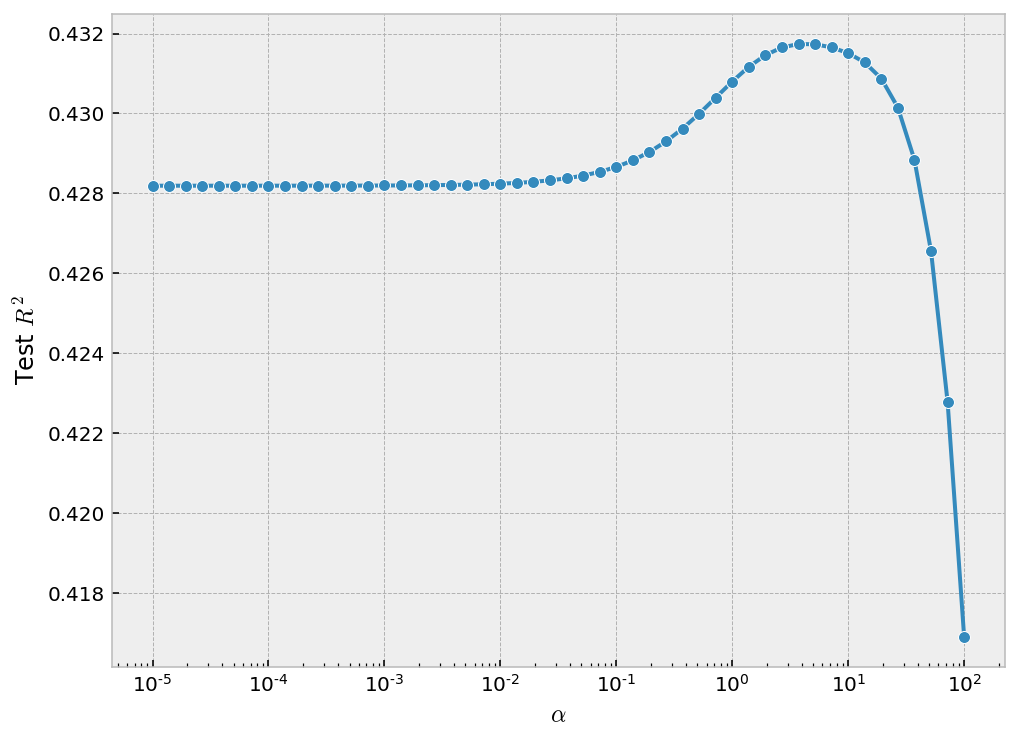

In [119]:
plt.plot(alphas, test_score, 'o-')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Test $R^2$');

In [120]:
ind = np.argmax(test_score)

alpha = alphas[ind]

ind, alpha

(39, 3.727593720314938)

In [121]:
model = Ridge(alpha=alpha)
model.fit(Xs, y);

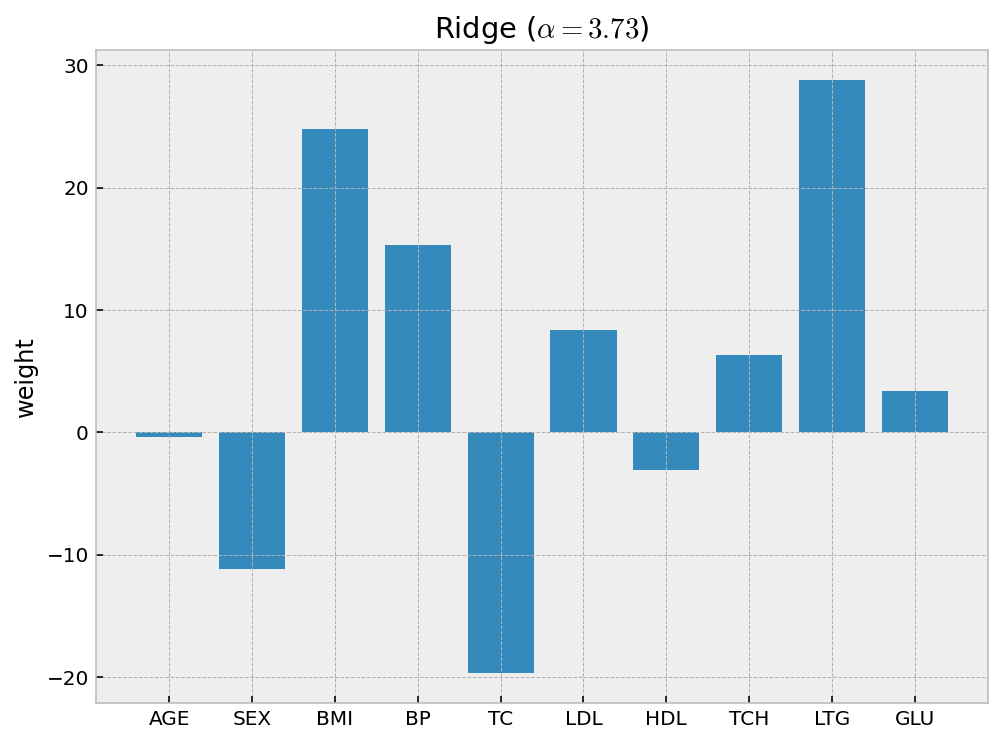

In [122]:
n = len(model.coef_)
plt.bar(range(n), model.coef_)
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title(fr'Ridge ($\alpha = {alpha:.2f}$)');

Let's try splitting the data into train/test sets in different ways.

In [123]:
Xs_train1, Xs_test1, y_train1, y_test1 = train_test_split(Xs, y, shuffle=True, test_size=0.4, random_state=1)
Xs_train2, Xs_test2, y_train2, y_test2 = train_test_split(Xs, y, shuffle=True, test_size=0.5, random_state=1)

Xs_train1.shape, Xs_train2.shape

((265, 10), (221, 10))

Will how we split the data affect our selected model?

In [124]:
alphas = np.logspace(-5, 2, 50)

test_score1 = np.zeros(alphas.shape)
test_score2 = np.zeros(alphas.shape)

for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha)
    
    # test score for first way data was split
    model.fit(Xs_train1, y_train1)
    test_score1[i] = model.score(Xs_test1, y_test1)
    
    # test score for second way data was split
    model.fit(Xs_train2, y_train2)
    test_score2[i] = model.score(Xs_test2, y_test2)

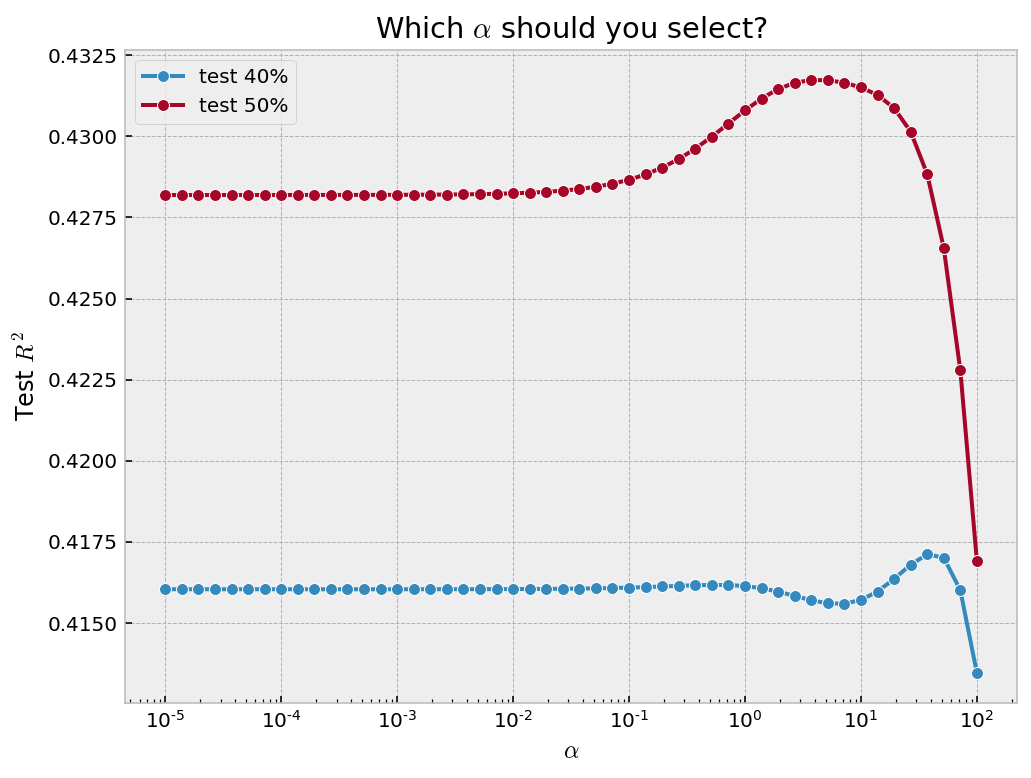

In [125]:
# test score for multiple partitions
plt.plot(alphas, test_score1, 'o-', label='test 40%')
plt.plot(alphas, test_score2, 'o-', label='test 50%')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Test $R^2$')
plt.title(r'Which $\alpha$ should you select?')
plt.legend();

Why not try multiple different ways to split the data and see which model does the best overall?

That's cross validation.

Apply 5-fold cross validation in order to select the best Ridge model (i.e., best $\alpha$).

In [126]:
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle

# cross_validate DOES NOT shuffle the data by default.
# this is so we can evaluate each model (alpha) on the exact same data partitioning
Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)

K = 5
alphas = np.logspace(-5, 3, 50)
cv_score = np.zeros((K,len(alphas)))  # folds x models

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    cv_results = cross_validate(ridge, Xs_shuffled, y_shuffled, cv=K, scoring='r2')
    cv_score[:,i] = cv_results['test_score']

In [127]:
cv_score_mean = cv_score.mean(axis=0)
cv_score_std = cv_score.std(axis=0)

ind = np.argmax(cv_score_mean)
alpha = alphas[ind]

alpha

1.6768329368110066

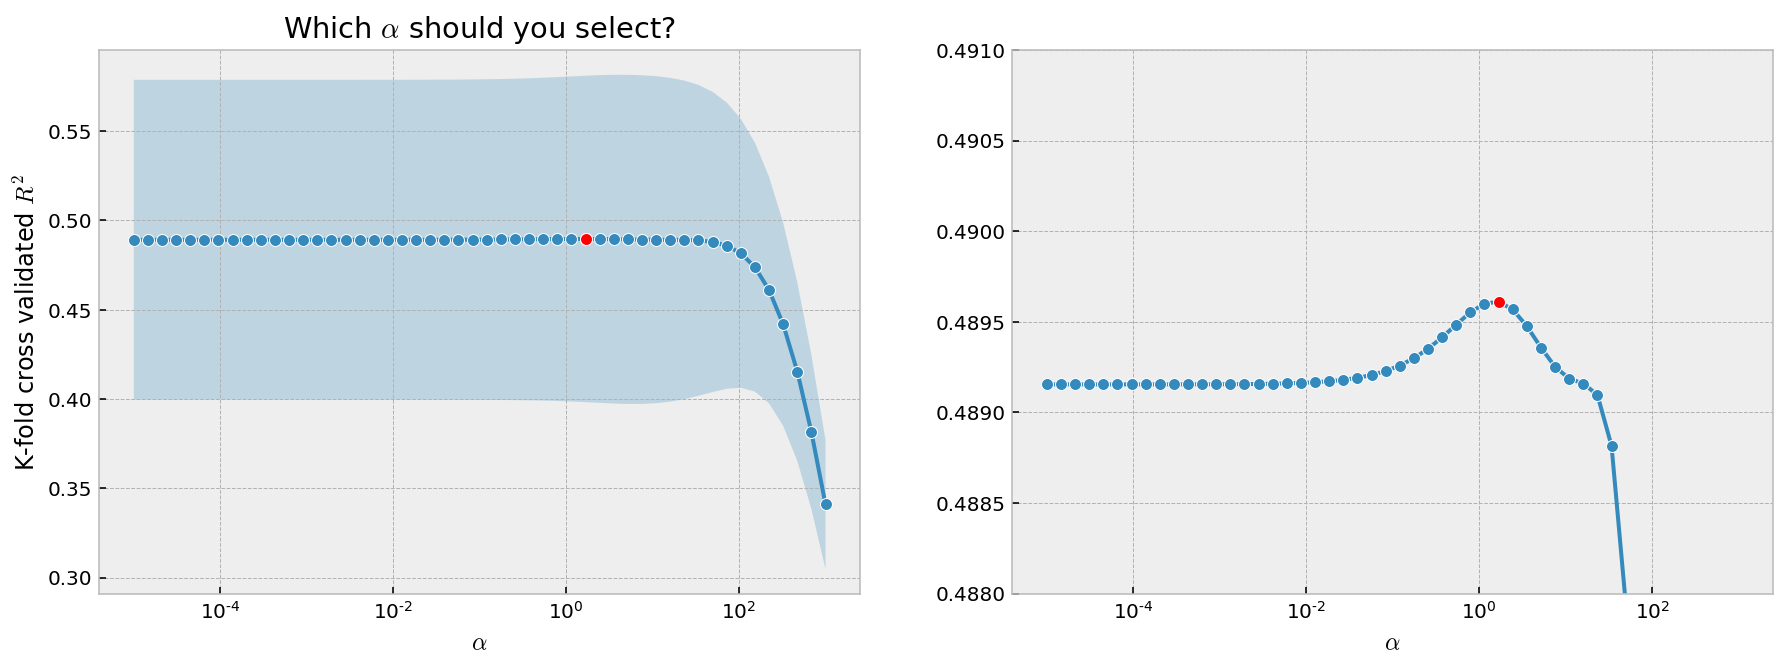

In [128]:
# cross validated score w/ standard deviation envelope
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(alphas, cv_score_mean, 'o-')
plt.plot(alpha, cv_score_mean[ind], 'ro')
plt.fill_between(alphas, cv_score_mean - cv_score_std, cv_score_mean + cv_score_std, alpha=0.25)
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('K-fold cross validated $R^2$')
plt.title(r'Which $\alpha$ should you select?')

plt.subplot(122)
plt.plot(alphas, cv_score_mean, 'o-')
plt.plot(alpha, cv_score_mean[ind], 'ro')
plt.ylim([0.488, 0.491])
plt.xscale('log')
plt.xlabel(r'$\alpha$');

From the above plot all $\alpha$ from ~0-80 are all about equally as good.

If that's true, then which $\alpha$ from 0-80 should you choose and why?

In [129]:
from sklearn.linear_model import RidgeCV

# RidgeCV DOES NOT shuffle the data
Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)

alphas = np.logspace(-5, 3, 50)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(Xs_shuffled, y_shuffled)

ridge.alpha_

1.6768329368110066

In the above code, try shuffling the data using a different random seed.

Does it make a difference for your selected model?

In [130]:
# RidgeCV defaults to leave one out cross validation where shuffling does not matter
alphas = np.logspace(-5, 3, 50)
ridge = RidgeCV(alphas=alphas)
ridge.fit(Xs, y)

ridge.alpha_

1.6768329368110066

In [131]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

alphas = np.logspace(-5, 3, 50)

ridge = RidgeCV(alphas=alphas)
ridge.fit(Xs, y)

lasso = LassoCV(alphas=alphas)
lasso.fit(Xs, y)

enet = ElasticNetCV(alphas=alphas)
enet.fit(Xs, y)

ridge.alpha_, lasso.alpha_, enet.alpha_

(1.6768329368110066, 0.08286427728546843, 0.0013257113655901081)

# Exercise

Use 10-fold cross validation to determine the optimal choice of $\alpha$ for a Lasso model of diabetes progression based on patient data features.

In [ ]:
from sklearn.linear_model import Lasso

# shuffle data
...

K = 10
alphas = np.logspace(-3, 1.5, 30)
cv_score = ...  # memory to hold scores: shape  = folds x models

for i, alpha in enumerate(alphas):
    # create lasso model
    ...
    
    # obtain cross validation results (use R^2 score)
    ...
    
    # store scores for each fold in cv_score
    cv_score[:,i] = ...

# mean and standard deviation across folds for each alpha
cv_score_mean = ...
cv_score_std = ...

# get index of alpha with best mean score
ind = ...

# get alpha with best mean score
alpha = alphas[ind]

In [ ]:
# plot alphas vs score
plt.plot(alphas, cv_score_mean, 'o-')
plt.plot(alpha, cv_score_mean[ind], 'ro')
plt.fill_between(alphas, cv_score_mean - cv_score_std, cv_score_mean + cv_score_std, alpha=0.25)
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('K-fold cross validated $R^2$');

In [ ]:
# generate final lasso model using selected alpha
model = ...
...

In [ ]:
# plot lasso model coefficients
n = len(model.coef_)
plt.bar(range(n), model.coef_)
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title(fr'Lasso ($\alpha = {alpha:.2f}$)');

Exhaustive grid search over parameter space.

In [140]:
from sklearn.model_selection import GridSearchCV

Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)
params = {'alpha': np.logspace(-3, 1.5, 30)}
model = Lasso()
cv = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
cv.fit(Xs_shuffled, y_shuffled)
alpha = cv.best_params_['alpha']
model = Lasso(alpha=alpha)

alpha

0.887719708898587

In [136]:
cv.cv_results_['mean_test_score']

array([-2985.24718414, -2985.25203231, -2985.25934192, -2985.27045595,
       -2985.28781758, -2985.31555598, -2985.36120969, -2985.35778074,
       -2985.13779765, -2984.57139512, -2984.2152476 , -2983.7549679 ,
       -2983.4796126 , -2984.08181842, -2987.84428934, -2990.40322899,
       -2986.86681037, -2985.00643763, -2983.205588  , -2981.61750607,
       -2982.2016189 , -2993.55163359, -3015.12317464, -3043.20727059,
       -3101.82534885, -3176.17072677, -3295.24811576, -3530.6297478 ,
       -3932.11464344, -4654.361307  ])

In [137]:
cv.cv_results_['std_test_score']

array([472.49218481, 472.48321027, 472.47049617, 472.45248471,
       472.4271676 , 472.39164308, 472.34245278, 472.21052348,
       471.92853647, 472.00197925, 471.93558442, 471.67287329,
       471.07351551, 469.98704405, 469.06763394, 468.21774207,
       466.13578286, 461.79283883, 454.99405802, 446.07619735,
       434.50029689, 419.09946806, 399.07446576, 377.34176617,
       357.83977031, 354.84219598, 348.99641613, 351.08339267,
       381.37447574, 503.28450874])

In [133]:
cv.__dict__

{'scoring': 'neg_mean_squared_error',
 'estimator': Lasso(),
 'n_jobs': None,
 'refit': True,
 'cv': 10,
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'alpha': array([1.00000000e-03, 1.42946134e-03, 2.04335972e-03, 2.92090372e-03,
         4.17531894e-03, 5.96845700e-03, 8.53167852e-03, 1.21957046e-02,
         1.74332882e-02, 2.49202115e-02, 3.56224789e-02, 5.09209564e-02,
         7.27895384e-02, 1.04049831e-01, 1.48735211e-01, 2.12611233e-01,
         3.03919538e-01, 4.34441230e-01, 6.21016942e-01, 8.87719709e-01,
         1.26896100e+00, 1.81393069e+00, 2.59294380e+00, 3.70651291e+00,
         5.29831691e+00, 7.57373918e+00, 1.08263673e+01, 1.54758735e+01,
         2.21221629e+01, 3.16227766e+01])},
 'multimetric_': False,
 'best_index_': 19,
 'best_score_': -2981.6175060729806,
 'best_params_': {'alpha': 0.887719708898587},
 'best_estimator_': Lasso(alpha=0.887719708898587),
 'refit_time_': 0.00042700767517089844,
 '

Non-exhaustive randomized search across parameter space (much faster when parameter space is huge).

In [142]:
from sklearn.model_selection import RandomizedSearchCV

Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)
params = {'alpha': np.logspace(-3, 1.5, 30000)}
model = Lasso()
cv = RandomizedSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
cv.fit(Xs_shuffled, y_shuffled)
alpha = cv.best_params_['alpha']
model = Lasso(alpha=alpha)

alpha

0.986506164276942

# Example Revisited

Consider the following task from [Steinmetz et al. (2019)](https://www.nature.com/articles/s41586-019-1787-x): For a repeated series of trials, a mouse is trained to rotate a wheel to indicate whether it perceives a Gabor pattern to the left or right. Spike rates from many cortical neurons are recorded on each trial. The goal is to build a model that can predict the mouse's choice based on the spiking of its cortical neurons.

![](images/gabor.png)

Adapted from [Neuromatch Academy](https://compneuro.neuromatch.io/tutorials/W1D4_GeneralizedLinearModels/student/W1D4_Tutorial2.html)

Load the data:

* `choices`: mouse chooses whether a Gabor stimulus is to the left or right on each of 276 trials 
* `spikes`: normalized spike rates for each of 691 neurons across the cortex recorded with Neuropixel probes on each trial

In [161]:
spikes = np.load('mouse_cortical_spiking.npy')
choices = np.load('mouse_left_right_choices.npy')

spikes.shape, choices.shape

((276, 691), (276,))

Use a logistic regression model to predict the mouse's choice (left or right) based on its cortical activity in each trial.

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# cross_validate DOES NOT shuffle the data by default.
# this is so we can evaluate each model (alpha) on the exact same data partitioning
X_shuffled, y_shuffled = shuffle(spikes, choices, random_state=0)

invalphas = 1 / np.logspace(-3, 3, 30)
K = 5
cv_accuracy = np.zeros((K,len(invalphas)))

for i, invalpha in enumerate(invalphas):
    model = LogisticRegression(penalty='l2', C=invalpha, max_iter=300)
    cv_accuracy[:,i] = cross_val_score(model, X_shuffled, y_shuffled, cv=K, scoring='accuracy')

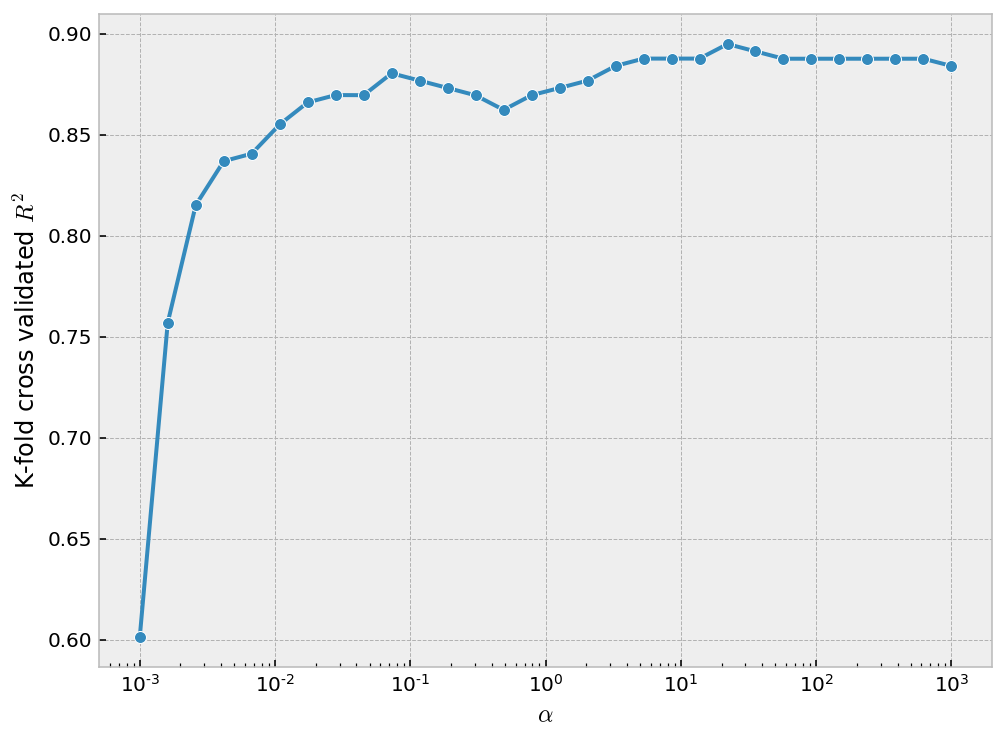

In [164]:
plt.plot(invalphas, cv_accuracy.mean(axis=0), 'o-')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('K-fold cross validated $R^2$');

# Exercise

For the logistic regression model predicting a mouse's left/right choice above, find the value of $\alpha$ with the best cross validated accuracy. Use this alpha to generate a final logistic regression model using all available data.

In [ ]:
...

alpha = ...

final_model = ...

# Example revisited

Modeling retinal ganglion spike train by fitting a temporal receptive field.

Poisson GLM spike count prediction based on stimulus history.

Adapted from [Neuromatch Academy](https://neuronline.sfn.org/scientific-research/tutorial-1-generalized-linear-models)

In [145]:
# data from Jonathan Pillow's lab: https://github.com/pillowlab/GLMspiketraintutorial
stimulus = np.load('retinal_ganglion_stimulus.npy')
spikes = np.load('retinal_ganglion_spikes.npy')

stimulus.shape, spikes.shape

((20000,), (20000,))

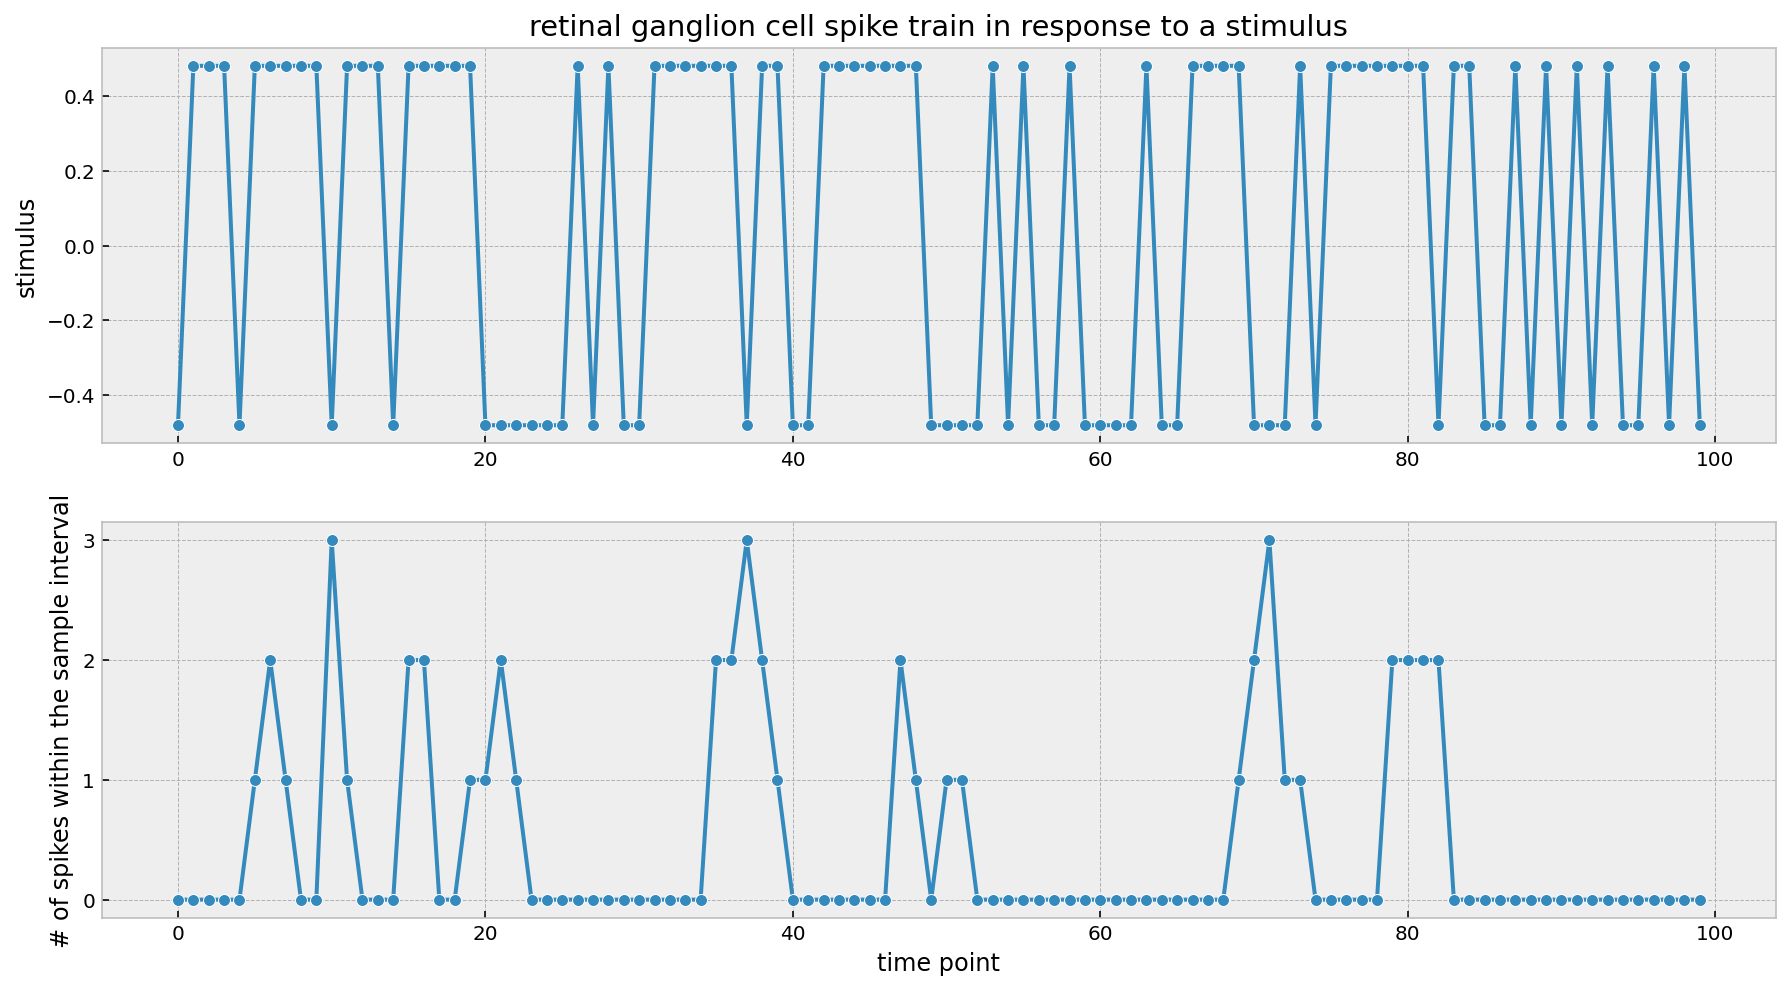

In [160]:
# retinal ganglion stimulus and spike data
plt.figure(figsize=[15,8])
plt.subplot(211)
plt.plot(stimulus[:100], 'o-')
plt.ylabel('stimulus')
plt.title('retinal ganglion cell spike train in response to a stimulus')
plt.subplot(212)
plt.plot(spikes[:100], 'o-')
plt.yticks(range(4))
plt.ylabel('# of spikes within the sample interval')
plt.xlabel('time point');

In [146]:
def stimulus_to_X(stimulus):
    T = len(stimulus)
    X = np.zeros((T, 25))
    for t in range(T):
        if t < 24:
            X[t,-t-1:] = stimulus[:t+1]  # last t columns of row t
        else:
            X[t,:] = stimulus[t-24:t+1]  # full row t
    return X

X = stimulus_to_X(stimulus)
y = spikes

In [147]:
from sklearn.linear_model import PoissonRegressor

model = PoissonRegressor(alpha=0)

# fit the model to the data X, y
model.fit(X, y)

# predict the spike counts based on the stimulus
poisson_spikes = model.predict(X)

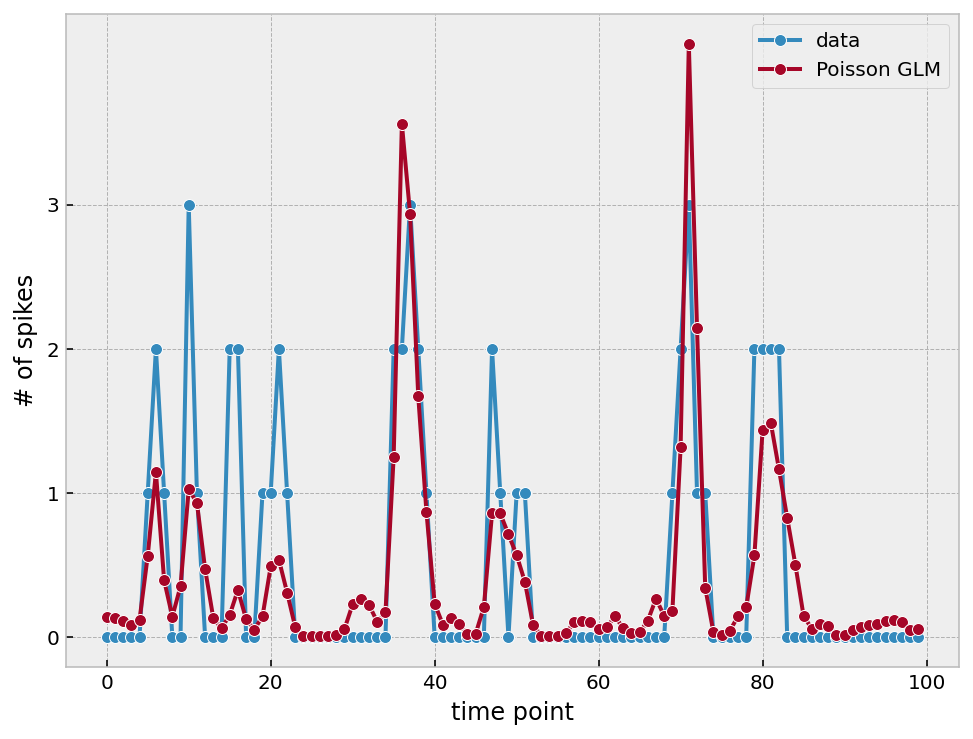

In [148]:
# poisson GLM spike count prediction
plt.plot(spikes[:100], 'o-', label='data')
plt.plot(poisson_spikes[:100], 'o-', label='Poisson GLM')
plt.yticks(range(4))
plt.xlabel('time point')
plt.ylabel('# of spikes')
plt.legend();

But what $\alpha$ should we use to regularize the Poisson GLM model?

[PoissonRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html)

In [153]:
Xs_shuffled, y_shuffled = shuffle(X, y, random_state=0)
alphas = np.logspace(-5, 2, 50)
params = {'alpha': alphas}
model = PoissonRegressor()
cv = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
cv.fit(Xs_shuffled, y_shuffled)
alpha = cv.best_params_['alpha']

final_model = PoissonRegressor(alpha=alpha)

alpha

0.012648552168552958

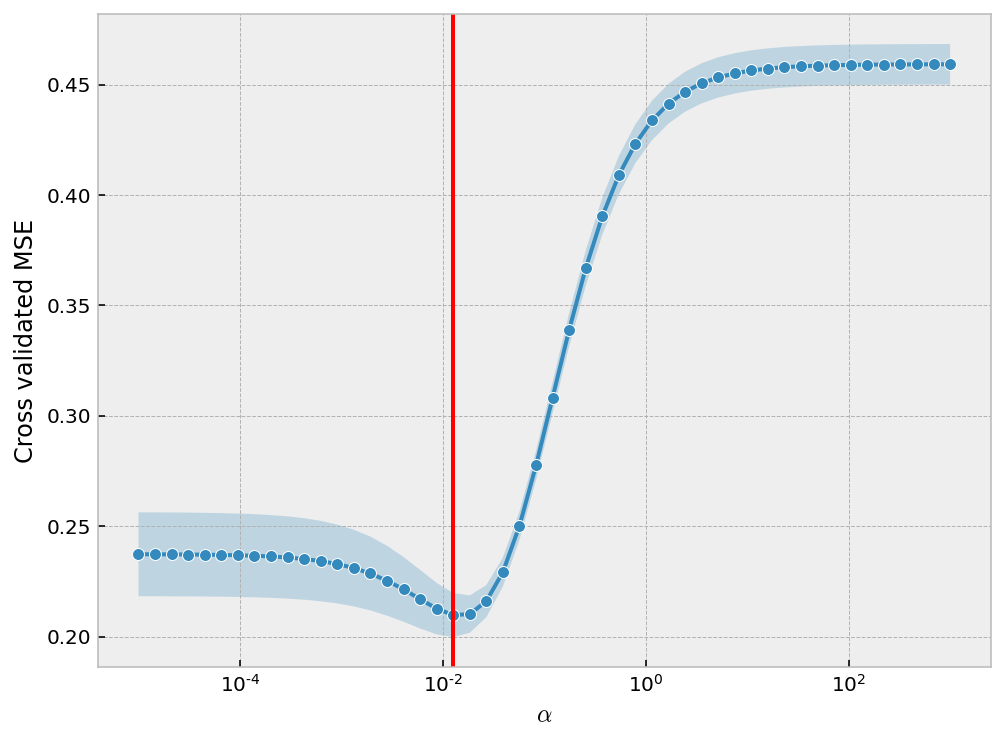

In [159]:
mse_mean = -cv.cv_results_['mean_test_score']
mse_std = cv.cv_results_['std_test_score']

plt.plot(alphas, mse_mean, 'o-')
plt.axvline(alpha, color='r')
plt.fill_between(alphas, mse_mean - mse_std, mse_mean + mse_std, alpha=0.25)
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Cross validated MSE');